# Wind speed

## Load data

In [1]:
import pandas as pd
df_wind = pd.read_csv('../data/data_wind.csv')

In [2]:
df_wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [3]:
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

In [4]:
df_wind.isnull().sum().sum()

0

We don't have missing values.

In [5]:
df_wind.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

## Preprocessing

In [6]:
df_wind_preprocessed = df_wind.copy()

We don't have significative column names so we can rename them.

In [7]:
new_columns = [
    'Hora',
    'Dirección del viento horaria (gr)',
    'Velocidad horario del viento (m/s)',
    'Humedad rel. máx. hora anterior (AUT) (%)',
    'Humedad rel. mín. hora anterior (AUT) (%)',
    'Temperatura máx. hora anterior (AUT) (℃)',
    'Temperatura mín. hora anterior (AUT) (℃)',
    'Humedad relativa horaria (%)',
    'Presión atmosférica a nivel de estación, horaria (mB)',
    'Precipitación total por hora (mm)',
    'Máxima ráfaga de viento (m/s)',
    'Presión atmosférica máx. hora anterior (AUT) (mB)',
    'Presión atmosférica mín. hora anterior (AUT) (mB)'
]

df_wind_preprocessed.rename(columns=dict(zip(df_wind.columns, new_columns)), inplace=True)
df_wind_preprocessed.columns

Index(['Hora', 'Dirección del viento horaria (gr)',
       'Velocidad horario del viento (m/s)',
       'Humedad rel. máx. hora anterior (AUT) (%)',
       'Humedad rel. mín. hora anterior (AUT) (%)',
       'Temperatura máx. hora anterior (AUT) (℃)',
       'Temperatura mín. hora anterior (AUT) (℃)',
       'Humedad relativa horaria (%)',
       'Presión atmosférica a nivel de estación, horaria (mB)',
       'Precipitación total por hora (mm)', 'Máxima ráfaga de viento (m/s)',
       'Presión atmosférica máx. hora anterior (AUT) (mB)',
       'Presión atmosférica mín. hora anterior (AUT) (mB)'],
      dtype='object')

In [8]:
print(df_wind_preprocessed['Hora'][0])
type(df_wind_preprocessed['Hora'][0])

12:00


str

Some values are missing, sometimes we go from the hour 17 to 19 for exemple. We can add this missing hours to the dataset.

In [9]:
total_added = 0

for _ in range(23):
    hours = df_wind_preprocessed['Hora']
    idx = 0
    nb_added = 0

    while idx < len(hours) - 1:
        cur_hour = int(hours[idx].split(':')[0])
        next_hour = int(hours[idx + 1].split(':')[0])
        if next_hour != (cur_hour + 1) % 24:
            # print(cur_hour, next_hour, f"=> add {str((cur_hour + 1) % 24)+':00'}")
            if (cur_hour + 1) % 24 < 10:
                new_str = "0"+str((cur_hour + 1) % 24)+":00"
            else:
                new_str = str((cur_hour + 1) % 24)+":00"
            new_row = pd.DataFrame({'Hora': [new_str]})
            df_wind_preprocessed = pd.concat([df_wind_preprocessed.iloc[:idx + nb_added + 1], new_row, df_wind_preprocessed.iloc[idx + nb_added + 1:]], ignore_index=True)
            nb_added += 1
        idx += 1
    print(f"Added {nb_added} rows")
    total_added += nb_added

print(f"Added {total_added} en total")

Added 866 rows


Added 332 rows


Added 241 rows


Added 182 rows


Added 141 rows


Added 122 rows


Added 106 rows


Added 92 rows


Added 79 rows


Added 67 rows


Added 57 rows


Added 52 rows


Added 44 rows


Added 41 rows


Added 37 rows


Added 31 rows


Added 27 rows


Added 23 rows


Added 16 rows


Added 11 rows


Added 8 rows


Added 5 rows


Added 3 rows
Added 2583 en total


The hour is given as a string. Considered we have data for almost ten years, we can change the format of the hour, starting with a given year, for instance the year 2000.

In [10]:
import datetime as dt

start_date = dt.datetime(2000, 1, 1, int(df_wind_preprocessed['Hora'][0][:2]))

df_wind_preprocessed['Fecha'] = [start_date + dt.timedelta(hours=i) for i in range(len(df_wind_preprocessed['Hora']))]

The data are not in the units of the international system. We can change that.

In [11]:
df_wind_preprocessed['Hora'] = df_wind_preprocessed['Hora'].apply(lambda x: int(x.split(':')[0]))

df_wind_preprocessed['Humedad rel. máx. hora anterior (AUT)'] = df_wind_preprocessed['Humedad rel. máx. hora anterior (AUT) (%)'].apply(lambda x: x/100)
df_wind_preprocessed.drop(columns=['Humedad rel. máx. hora anterior (AUT) (%)'], inplace=True)

df_wind_preprocessed['Humedad rel. mín. hora anterior (AUT)'] = df_wind_preprocessed['Humedad rel. mín. hora anterior (AUT) (%)'].apply(lambda x: x/100)
df_wind_preprocessed.drop(columns=['Humedad rel. mín. hora anterior (AUT) (%)'], inplace=True)

df_wind_preprocessed['Temperatura máx. hora anterior (AUT) (K)'] = df_wind_preprocessed['Temperatura máx. hora anterior (AUT) (℃)'].apply(lambda x: x+273.15)
df_wind_preprocessed.drop(columns=['Temperatura máx. hora anterior (AUT) (℃)'], inplace=True)

df_wind_preprocessed['Temperatura mín. hora anterior (AUT) (K)'] = df_wind_preprocessed['Temperatura mín. hora anterior (AUT) (℃)'].apply(lambda x: x+273.15)
df_wind_preprocessed.drop(columns=['Temperatura mín. hora anterior (AUT) (℃)'], inplace=True)

df_wind_preprocessed['Humedad relativa horaria'] = df_wind_preprocessed['Humedad relativa horaria (%)'].apply(lambda x: x/100)
df_wind_preprocessed.drop(columns=['Humedad relativa horaria (%)'], inplace=True)

df_wind_preprocessed['Presión atmosférica a nivel de estación, horaria (Pa)'] = df_wind_preprocessed['Presión atmosférica a nivel de estación, horaria (mB)'].apply(lambda x: x*100)
df_wind_preprocessed.drop(columns=['Presión atmosférica a nivel de estación, horaria (mB)'], inplace=True)

df_wind_preprocessed['Precipitación total por hora (m)'] = df_wind_preprocessed['Precipitación total por hora (mm)'].apply(lambda x: x/1000)
df_wind_preprocessed.drop(columns=['Precipitación total por hora (mm)'], inplace=True)

df_wind_preprocessed['Presión atmosférica máx. hora anterior (AUT) (Pa)'] = df_wind_preprocessed['Presión atmosférica máx. hora anterior (AUT) (mB)'].apply(lambda x: x*100)
df_wind_preprocessed.drop(columns=['Presión atmosférica máx. hora anterior (AUT) (mB)'], inplace=True)

df_wind_preprocessed['Presión atmosférica mín. hora anterior (AUT) (Pa)'] = df_wind_preprocessed['Presión atmosférica mín. hora anterior (AUT) (mB)'].apply(lambda x: x*100)
df_wind_preprocessed.drop(columns=['Presión atmosférica mín. hora anterior (AUT) (mB)'], inplace=True)

df_wind_preprocessed.columns

Index(['Hora', 'Dirección del viento horaria (gr)',
       'Velocidad horario del viento (m/s)', 'Máxima ráfaga de viento (m/s)',
       'Fecha', 'Humedad rel. máx. hora anterior (AUT)',
       'Humedad rel. mín. hora anterior (AUT)',
       'Temperatura máx. hora anterior (AUT) (K)',
       'Temperatura mín. hora anterior (AUT) (K)', 'Humedad relativa horaria',
       'Presión atmosférica a nivel de estación, horaria (Pa)',
       'Precipitación total por hora (m)',
       'Presión atmosférica máx. hora anterior (AUT) (Pa)',
       'Presión atmosférica mín. hora anterior (AUT) (Pa)'],
      dtype='object')

In [12]:
df_wind_preprocessed.head()

,Hora,Dirección del viento horaria (gr),Velocidad horario del viento (m/s),Máxima ráfaga de viento (m/s),Fecha,Humedad rel. máx. hora anterior (AUT),Humedad rel. mín. hora anterior (AUT),Temperatura máx. hora anterior (AUT) (K),Temperatura mín. hora anterior (AUT) (K),Humedad relativa horaria,"Presión atmosférica a nivel de estación, horaria (Pa)",Precipitación total por hora (m),Presión atmosférica máx. hora anterior (AUT) (Pa),Presión atmosférica mín. hora anterior (AUT) (Pa)
0,12,0.809017,1.8,3.8,2000-01-01 12:00:00,0.69,0.60,295.75,293.85,0.61,88820.0,0.0,88820.0,88770.0
1,13,0.965926,2.7,4.7,2000-01-01 13:00:00,0.62,0.55,297.35,295.65,0.55,88840.0,0.0,88840.0,88820.0
2,14,0.891007,2.0,4.9,2000-01-01 14:00:00,0.56,0.50,298.65,297.45,0.51,88810.0,0.0,88840.0,88810.0
3,15,0.848048,2.5,5.8,2000-01-01 15:00:00,0.52,0.44,300.55,298.15,0.44,88740.0,0.0,88810.0,88740.0
4,16,0.224951,2.4,5.8,2000-01-01 16:00:00,0.50,0.43,300.25,298.65,0.46,88650.0,0.0,88740.0,88650.0


In [13]:
df_wind_preprocessed.to_csv('../data/data_wind_preprocessed.csv', index=False)

## Load data preprocessed

In [14]:
import pandas as pd

data_wind = pd.read_csv("../data/data_wind_preprocessed.csv")

## EDA

In [15]:
data_eda = data_wind.drop(columns=['Hora', 'Fecha'])
data_eda.shape

(90276, 12)

### Missing values

In [16]:
missing_data_count = data_wind.isnull().sum()
missing_data_percentage = round((missing_data_count / len(data_wind)) * 100, 1)

missing_data_stats = pd.DataFrame({
    'Missing data (count)': missing_data_count,
    'Missing data (%)': missing_data_percentage
})

missing_data_stats

,Missing data (count),Missing data (%)
Hora,0,0.0
Dirección del viento horaria (gr),2583,2.9
Velocidad horario del viento (m/s),2583,2.9
Máxima ráfaga de viento (m/s),2583,2.9
Fecha,0,0.0
Humedad rel. máx. hora anterior (AUT),2583,2.9
Humedad rel. mín. hora anterior (AUT),2583,2.9
Temperatura máx. hora anterior (AUT) (K),2583,2.9
Temperatura mín. hora anterior (AUT) (K),2583,2.9
Humedad relativa horaria,2583,2.9


### Statistics

In [17]:
data_wind.describe()

,Hora,Dirección del viento horaria (gr),Velocidad horario del viento (m/s),Máxima ráfaga de viento (m/s),Humedad rel. máx. hora anterior (AUT),Humedad rel. mín. hora anterior (AUT),Temperatura máx. hora anterior (AUT) (K),Temperatura mín. hora anterior (AUT) (K),Humedad relativa horaria,"Presión atmosférica a nivel de estación, horaria (Pa)",Precipitación total por hora (m),Presión atmosférica máx. hora anterior (AUT) (Pa),Presión atmosférica mín. hora anterior (AUT) (Pa)
count,90276.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,11.500798,0.405810,2.466192,5.161076,0.690585,0.631762,295.071264,293.834570,0.661467,88725.192547,0.000161,88758.072366,88689.109279
std,6.922225,0.686247,1.313968,2.311157,0.196402,0.201663,3.721386,3.513744,0.199923,401.240375,0.001308,364.675005,356.453928
min,0.000000,-1.000000,0.000000,0.000000,0.120000,0.100000,282.350000,281.550000,0.100000,86340.000000,0.000000,86530.000000,86280.000000
25%,6.000000,-0.156434,1.500000,3.400000,0.540000,0.480000,292.350000,291.550000,0.510000,88530.000000,0.000000,88560.000000,88500.000000
50%,12.000000,0.788011,2.400000,5.000000,0.720000,0.640000,294.550000,293.350000,0.680000,88720.000000,0.000000,88750.000000,88690.000000
75%,18.000000,0.970296,3.400000,6.800000,0.870000,0.800000,297.850000,296.250000,0.840000,88910.000000,0.000000,88930.000000,88880.000000
max,23.000000,1.000000,10.000000,24.300000,1.000000,0.980000,308.450000,307.550000,0.990000,102350.000000,0.070800,91310.000000,91090.000000


### Plot time sery

In [18]:
import plotly.graph_objects as go

for col in data_eda.columns:
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=data_wind['Fecha'], y=data_wind[col], mode='lines', name=col))

    fig.update_layout(title=f'{col} over time',
                  xaxis_title='Date', 
                  yaxis_title=col,
                  margin=dict(l=20, r=20, t=40, b=20))
    fig.show()


ModuleNotFoundError: No module named 'plotly'

#### Random week

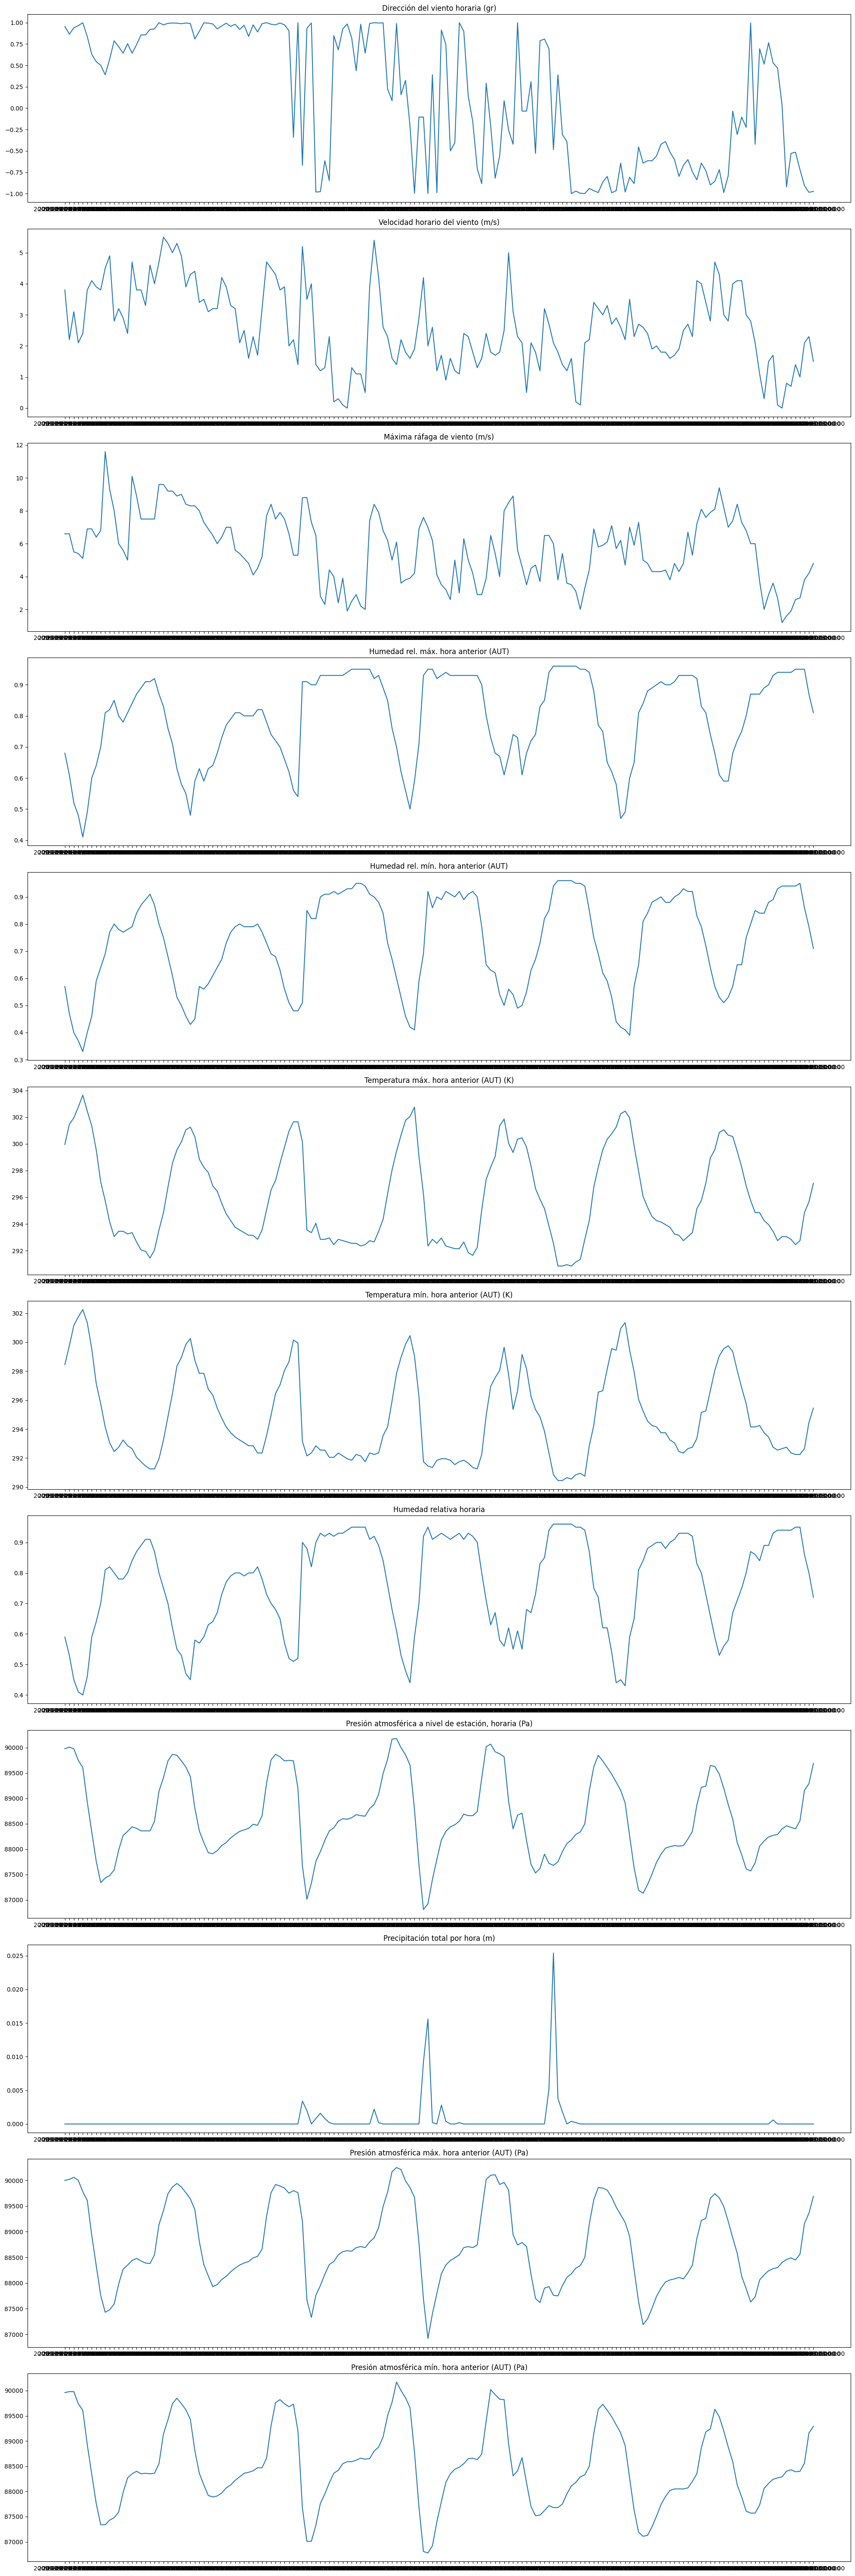

In [18]:
from matplotlib import pyplot as plt
from random import randint, seed
seed(42)

fig, axs = plt.subplots(12, 1, figsize=(20, 60))
nb_values = 24*7

rdm_idx = randint(0, data_wind.shape[0] - nb_values)

for i, column in enumerate(data_eda.columns):
    axs[i].plot(data_wind['Fecha'][rdm_idx:rdm_idx+nb_values], data_eda[column][rdm_idx:rdm_idx+nb_values])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

### Boxplot

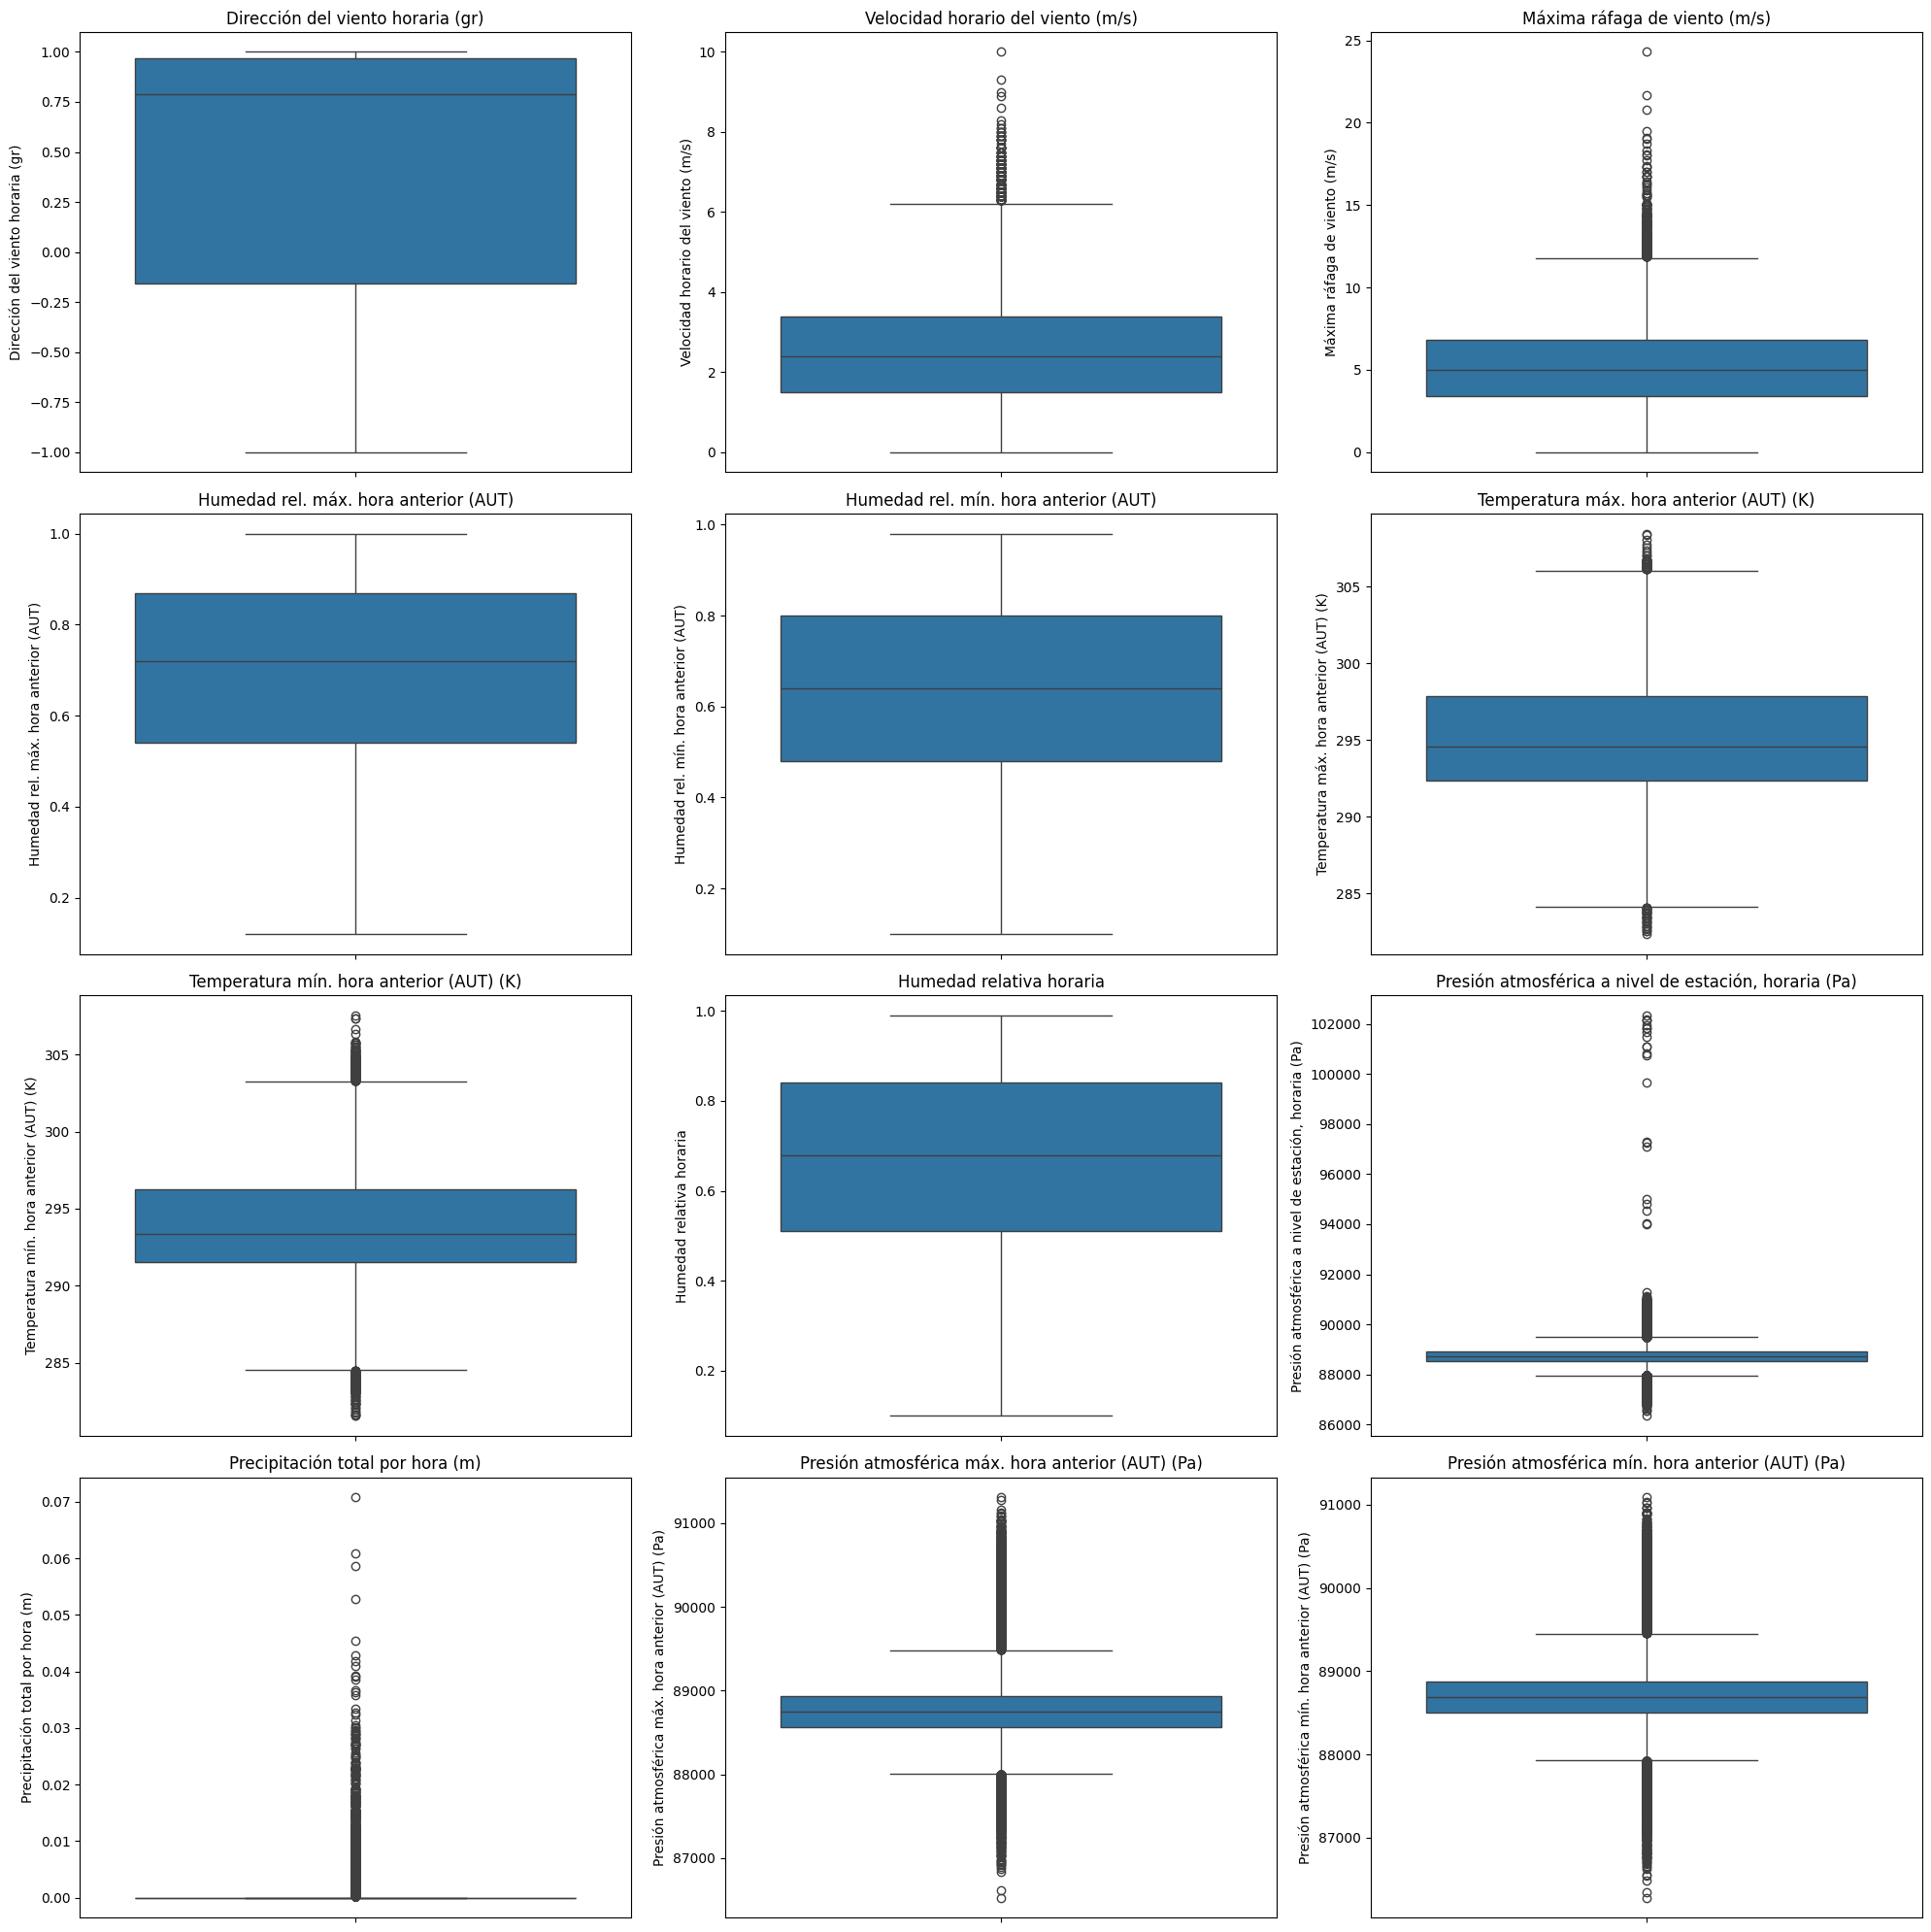

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, column in enumerate(data_eda.columns):
    sns.boxplot(data=data_eda[column], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(column)

plt.tight_layout()
plt.show()


### Scatterplot and regplot

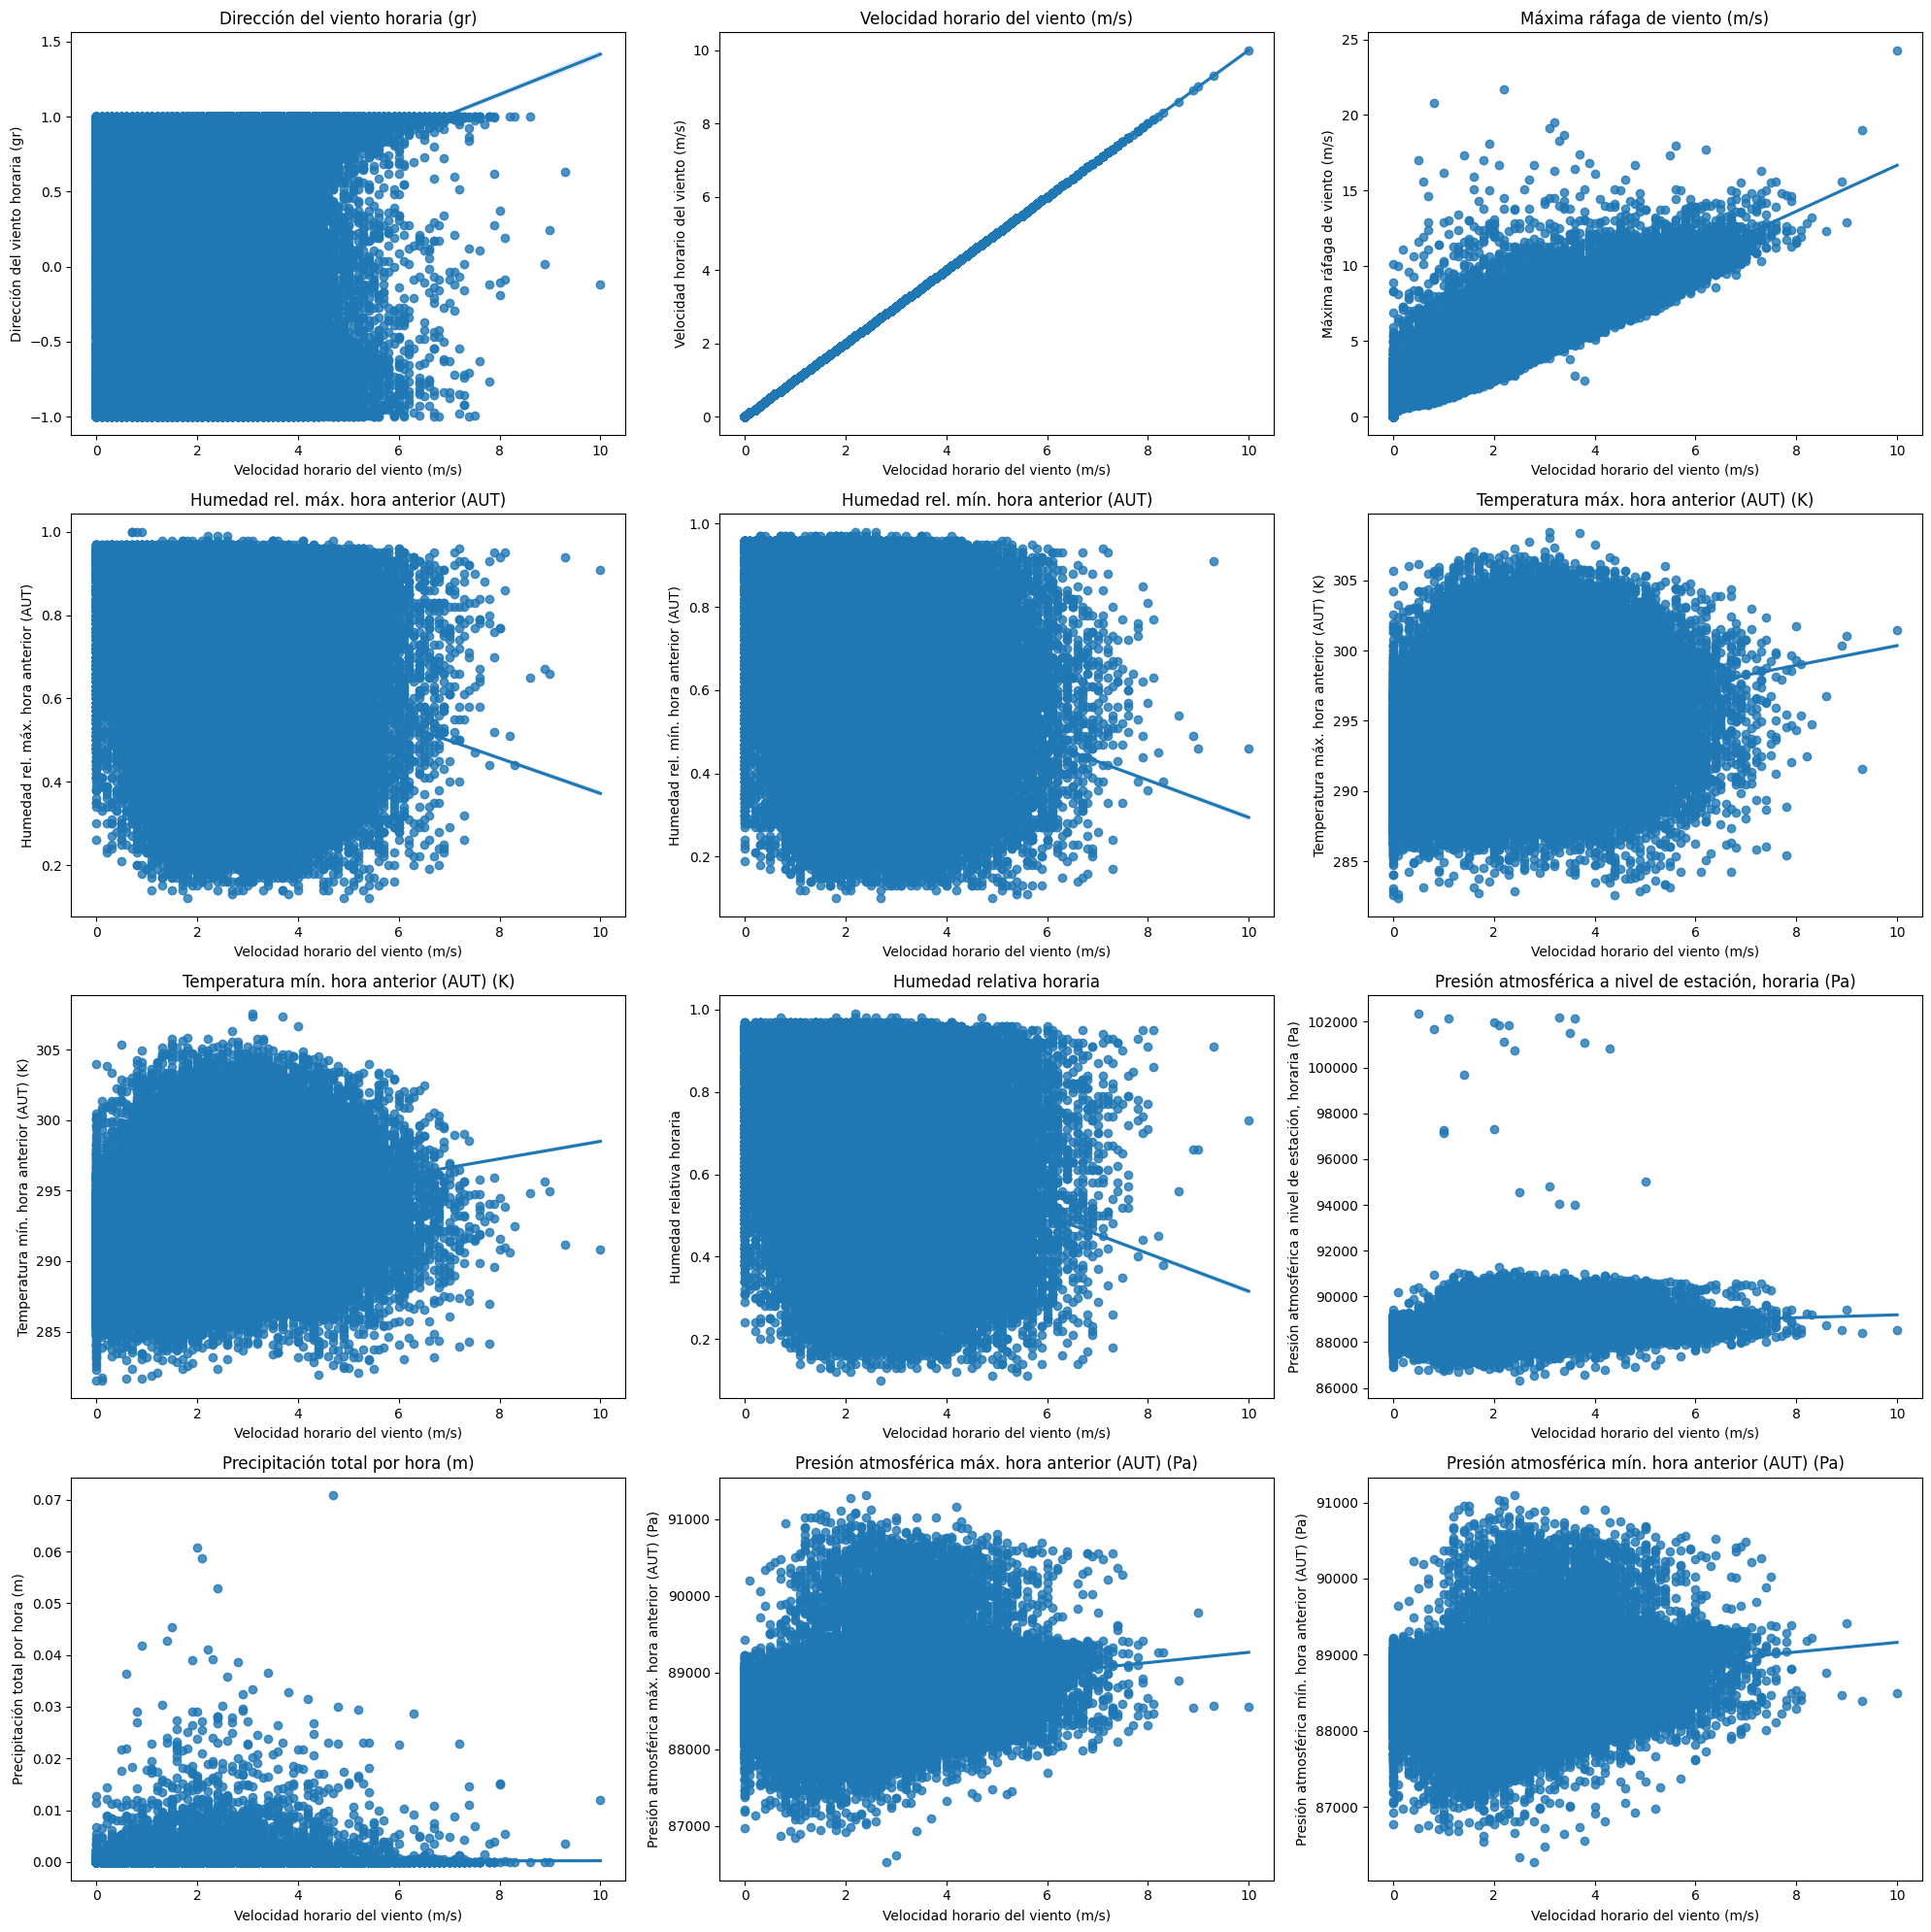

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, column in enumerate(data_eda.columns):
    sns.regplot(data=data_eda, x='Velocidad horario del viento (m/s)', y=column, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(column)

plt.tight_layout()
plt.show()

## Imputation of data

In [4]:
import warnings
warnings.filterwarnings('ignore')

data_wind_imputed = data_wind.interpolate(method='linear', axis=0)

data_wind_imputed.to_csv('../data/data_wind_imputed.csv', index=False)

#### Before imputation

In [8]:
data_wind[317:320]

,Hora,Dirección del viento horaria (gr),Velocidad horario del viento (m/s),Máxima ráfaga de viento (m/s),Fecha,Humedad rel. máx. hora anterior (AUT),Humedad rel. mín. hora anterior (AUT),Temperatura máx. hora anterior (AUT) (K),Temperatura mín. hora anterior (AUT) (K),Humedad relativa horaria,"Presión atmosférica a nivel de estación, horaria (Pa)",Precipitación total por hora (m),Presión atmosférica máx. hora anterior (AUT) (Pa),Presión atmosférica mín. hora anterior (AUT) (Pa)
317,17,0.838671,2.9,6.4,2000-01-14 17:00:00,0.54,0.48,298.85,297.35,0.49,89000.0,0.0,89050.0,89000.0
318,18,NaN,NaN,NaN,2000-01-14 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,19,0.766044,2.7,6.1,2000-01-14 19:00:00,0.51,0.45,299.15,298.05,0.47,88950.0,0.0,88960.0,88940.0


#### After imputation

In [10]:
data_wind_imputed[317:320]

,Hora,Dirección del viento horaria (gr),Velocidad horario del viento (m/s),Máxima ráfaga de viento (m/s),Fecha,Humedad rel. máx. hora anterior (AUT),Humedad rel. mín. hora anterior (AUT),Temperatura máx. hora anterior (AUT) (K),Temperatura mín. hora anterior (AUT) (K),Humedad relativa horaria,"Presión atmosférica a nivel de estación, horaria (Pa)",Precipitación total por hora (m),Presión atmosférica máx. hora anterior (AUT) (Pa),Presión atmosférica mín. hora anterior (AUT) (Pa)
317,17,0.838671,2.9,6.40,2000-01-14 17:00:00,0.540,0.480,298.85,297.35,0.49,89000.0,0.0,89050.0,89000.0
318,18,0.802358,2.8,6.25,2000-01-14 18:00:00,0.525,0.465,299.00,297.70,0.48,88975.0,0.0,89005.0,88970.0
319,19,0.766044,2.7,6.10,2000-01-14 19:00:00,0.510,0.450,299.15,298.05,0.47,88950.0,0.0,88960.0,88940.0
